MACHINE LEARNING MODEL - IMPLEMENTING A LINEAR REGRESSION MODEL IN PYTHON

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()

In [2]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = 'your subscription id'
resource_group = 'ML-Studio'
workspace_name = 'ML_Modelling'

workspace = Workspace(subscription_id, resource_group, workspace_name)

path = Dataset.get_by_name(workspace, name='Order Details')
order_details = path.to_pandas_dataframe()

#make a copy of the dataset
order_details_profit = path.to_pandas_dataframe()

print(order_details.shape)
order_details

(1500, 6)


,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones
1496,B-26099,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,828.0,230.0,2,Furniture,Chairs
1498,B-26100,34.0,10.0,2,Clothing,T-shirt


                                     EXPLORE THE DATASETS

In [3]:
#PRint the data type
print(type(order_details))

#check dataset descirption
order_details.describe()

<class 'pandas.core.frame.DataFrame'>


,Amount,Profit,Quantity
count,1500.000000,1500.000000,1500.000000
mean,287.668000,15.970000,3.743333
std,461.050488,169.140565,2.184942
min,4.000000,-1981.000000,1.000000
25%,45.000000,-9.250000,2.000000
50%,118.000000,9.000000,3.000000
75%,322.000000,38.000000,5.000000
max,5729.000000,1698.000000,14.000000


                                        CLEAN DATASET

In [4]:
#check the shape of dataset
order_details.shape

(1500, 6)

In [5]:
#check for null cases

order_details.isnull().any()

Order ID        False
Amount          False
Profit          False
Quantity        False
Category        False
Sub-Category    False
dtype: bool

In [6]:


# cat_col = order_details[["Category"]]
# for col in cat_col:
#     cat_col[col].astype("category")

#remove the columns that are not of same datatype
remove_col  = ["Order ID", "Category", "Sub-Category"]
for col in remove_col:
    order_details.pop(col)

order_details

,Amount,Profit,Quantity
0,1275.0,-1148.0,7
1,66.0,-12.0,5
2,8.0,-2.0,3
3,80.0,-56.0,4
4,168.0,-111.0,2
...,...,...,...
1495,835.0,267.0,5
1496,2366.0,552.0,5
1497,828.0,230.0,2
1498,34.0,10.0,2


SPLIT AND TRAIN DATASET

In [7]:
X = order_details[[ "Amount", "Quantity"]]#INDEPENDENT VARIABLE
Y = order_details["Profit"]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=42 )

In [9]:
model  = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
Predicted_price = model.predict(x_test)


In [11]:
Predicted_price

array([ 3.19008240e+02,  1.38560036e+01,  2.51346078e+00, -5.35600498e+01,
       -2.89077852e+00,  3.52901960e+00,  2.08806640e+00,  2.97507842e+00,
        3.57186853e+00,  9.11128029e+00,  2.48221477e-01,  3.94116265e+00,
       -4.90366757e-01,  3.06226626e+01,  1.44231961e+01, -1.37487317e+01,
        6.66801959e+00,  9.21022948e+00, -9.36005123e+00,  2.60988097e+01,
        4.46063645e+01,  2.32881372e+00, -1.47632796e+00, -1.68448828e+01,
        9.62237253e+00,  3.04181386e+01, -3.98043228e-01, -5.98692958e+00,
        9.80701959e+00,  4.33633097e+01, -2.24451381e+00,  3.19218177e+01,
       -1.23210298e+01, -5.82690287e-01,  1.00227978e+02,  3.37616626e+01,
        7.49893136e+00, -1.69057264e+00, -6.45517289e+00,  1.24777763e+01,
        8.28699419e+00,  3.71366666e+00,  3.52901960e+00,  8.18804500e+00,
       -1.46719670e+01,  2.69810783e+00,  7.24023725e+01,  5.09851960e+00,
        6.97183645e+01,  1.20582003e+02,  8.56396478e+00,  8.47164125e+00,
       -1.91101221e+01, -

In [12]:
y_test

1116    1698.0
1368      90.0
422       -3.0
413      -15.0
451        0.0
         ...  
1083     -12.0
990        4.0
650        0.0
1188      -3.0
1498      10.0
Name: Profit, Length: 450, dtype: float64

In [13]:
model.score(x_test,y_test)

0.060121380915382217

In [14]:
predict_df  = pd.DataFrame({})

predict_df["Tested Profit"] = y_test
predict_df["Predicted Profit"] = Predicted_price

predict_df

,Tested Profit,Predicted Profit
1116,1698.0,319.008240
1368,90.0,13.856004
422,-3.0,2.513461
413,-15.0,-53.560050
451,0.0,-2.890779
...,...,...
1083,-12.0,-13.237639
990,4.0,6.298725
650,0.0,8.656288
1188,-3.0,-2.343463


#Using the whole dataset to test and split

In [15]:
order_details

,Amount,Profit,Quantity
0,1275.0,-1148.0,7
1,66.0,-12.0,5
2,8.0,-2.0,3
3,80.0,-56.0,4
4,168.0,-111.0,2
...,...,...,...
1495,835.0,267.0,5
1496,2366.0,552.0,5
1497,828.0,230.0,2
1498,34.0,10.0,2


In [16]:
model.score(x_test, y_test)

0.060121380915382217

                    VISUALIZING THE RESULT ON GRAPH

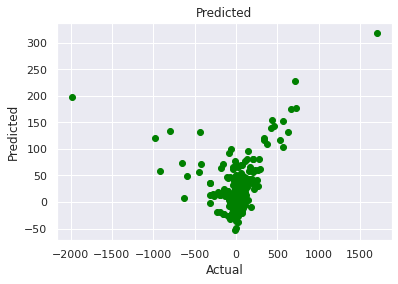

In [20]:

plt.scatter(y_test, Predicted_price, color='green') # plotting the regression line

plt.title("Predicted")

plt.xlabel("Actual") 
plt.ylabel("Predicted") 
plt.show() 